# Datorlaboration 4

## Syfte:
Syftet med dagens laborationen är att du skall bli mer förtrogen med :
* Enkel linjär regression.
* Multipel linjär regression.


## Förberedelseuppgifter
1. Repetera grafisk fördelningsanpassning (tex. normalfördelningsdiagram eller QQ-plot), läs genom hela regressionsdelen i statistikkompendiet (avsnitt 4-6) och hela denna laborationshandledning.
2. Ange modellen för enkel linjär regression och normalfördelade fel.
    1. **Mozquizto:** Hur skattar vi $\alpha, \beta$ och $\sigma^2$?
    2. Vilken fördelning får $\alpha^*$ och $\beta^*$?
    3. Hur gör vi konfidensintervall för $\alpha$ och $\beta$?
    4. **Mozquizto:** Hur kan vi testa huruvida linjens lutning är 0?
3. **Mozquizto:** 
    1. Hur ser ett konfidensintervall för $\mu_0 = \alpha + \beta x_0$ ut?
    2. Vad är ett prediktionsintervall och hur räknas det ut?
    3. Vad är ett kalibreringsintervall och hur kan det konstrueras?
4. Residualanalys är ett centralt moment i all regressionsanalys. Hur bör residualerna se ut vid en korrekt regressionsanalys? Ange några tekniker för att kontrollera detta.
5. Ange modellen för multipel linjär regression på matrisform.
6. **Mozquizto:** Hur ser normalekvationerna ut och hur löser vi dessa? Vad blir kovariansmatrisen för för $\boldsymbol{\beta}^*$?
7. Lös uppgift ST35.

# Importera moduler och ladda upp filer till Colab
Kör koden nedan för att hämta de väsentliga modulerna vi kommer att använda i laborationen.


In [18]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Utöver modulerna ovan använder laborationen ett par funktioner och datamaterial.
1. Ladda ner filerna från kurshemsidan
2. Klicka på mappen *Filer* till vänster i *google colab* menyn
3. Ladda upp filerna genom att klicka på *Ladda upp till sessionens lagringsutrymme* (eller drag-n-drop filen)

### Google Colabs

se till att rätt sökväg till datan används.

In [19]:
#import sys
#Addera content till sökvägen för python
#sys.path.append('/content')  #Här kan du behöva uppdater sökvägen.
#importera funktionerna

### Egen dator

Se till att rätt sökväg till datan används.

## Enkel linjär regression
Vid enkel linjär regression söker anpassas en rät linje till datamaterialet, dvs modellen är 

\begin{align}
Y_i=\alpha+\beta x_i+ \epsilon_i,\ i=1,...,n, \nonumber
\end{align}

där $\epsilon_i$ är oberoende likafördelade störningar med väntevärdet $\theta$ och variansen $\sigma^2$.
Vi kommer i den följande framställningen att arbeta med matrisformuleringen av modellen,

\begin{align}
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon} \nonumber
\end{align}

där de ingående matriserna har följande form:

\begin{align}
\mathbf{Y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad
\mathbf{X} = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \quad
\boldsymbol{\beta} = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}, \quad
\text{och} \quad
\boldsymbol{\epsilon} = \begin{pmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{pmatrix} \nonumber
\end{align}





### Uppgift ST35



Vi vill börja med att själva implementera en skattare av parametrarna i regressionsmodellen. Vi definierar våra beroende och oberoende variabler:

In [20]:
y = np.array([1.5, 2.3, 1.7, 2.0, 2.5, 1.9, 2.2, 2.4 ])
x = np.arange(8)+1
n = np.shape(x)
X = np.column_stack( (np.ones(n), y ) )


Nästa steg är att skatta parametrarna $\alpha$ och $\beta$ samt standardavvikelsen $\sigma$. Genomför beräkningarna som matrisoperationer (ex. `A @ B`) enligt regressionsmaterialet och visualisera sedan resultatet. 

[4.4408921e-15 1.0000000e+00]


<Axes: >

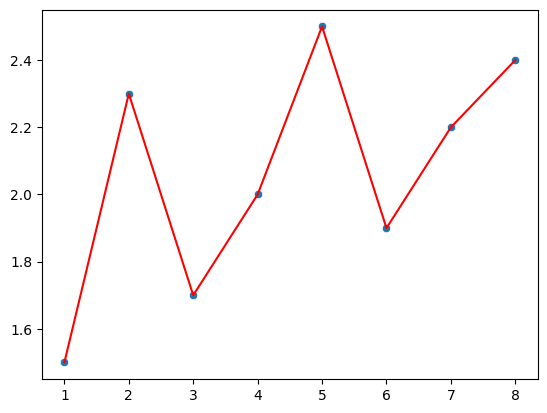

In [21]:
invXTX = np.linalg.inv(X.T @ X)
ab = invXTX @ (X.T @ y)

e = y-(X @ ab) # skattade residualer
f = n[0] - 2 # antal frihetsgrader - antal obs minus antal skattade parametrar. 
s = np.sqrt( e.T @ e /f) # skattad standardavvikelse

print(ab) # skriv ut parametervärdena för alpha,beta

plt.clf()
sns.scatterplot(x=x,y=y,markers='x') # observationer (x,y)
sns.lineplot(x=x,y=(X @ ab),color='red') # den skattade linjen y = X * beta

Vi vill sedan skapa konfidensintervall för $\alpha$ och $\beta$. För att göra det krävs att vi beräknar skattningarnas respektive medelfel, $d(\cdot)$. 95 % konfidensintervall kan sedan konstrueras: 

In [22]:
C = s**2*invXTX # skattad kovariansmatris för parameterskattningarna
d = np.sqrt(np.diag(C)) # medelfelen som vektor 
p = 0.05 # signifikansnivå
tinv = stats.t.ppf(1-p/2,f) #t-kvantil
Ia = ab[0] + np.array([-1,1])*tinv*d[0]
Ib = ab[1] + np.array([-1,1])*tinv*d[1]

R2 = 1 - (e.T @ e)/( (y.T @ y) - np.sum(y)**2/n[0] ) # förklaringsgrad
print(R2)

print(Ia)
print(Ib)

1.0
[-2.13301826e-14  3.02119668e-14]
[1. 1.]


**Uppgift:** Stämmer parameterskattningarna med beräkningarna i förberedelseuppgift 7?

Pythonpaketet `statsmodels` innehåller inbyggda funktioner för allehanda linjära modeller, däribland för linjär regression. Vi ska nu använda detta för att skatta parametrarna och konstruera konfidensintervall för dessa. 

In [23]:
X = sm.add_constant(x) # lägger till en kolumnvektor med ettor först.
model = sm.OLS(y,X).fit() # anpassar enkel/multipel linjär regressionsmodell
print(model.summary()) # visar den sammanfattande statistiken


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     2.955
Date:                Tue, 16 Dec 2025   Prob (F-statistic):              0.136
Time:                        01:46:54   Log-Likelihood:               -0.82268
No. Observations:                   8   AIC:                             5.645
Df Residuals:                       6   BIC:                             5.804
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6929      0.241      7.016      0.0

c:\Users\tonny\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Uppgift:** Identifiera parameterskattningen och deras konfidensintervall och jämför med tidigare beräkningar.

Vi ska också analysera residualerna visuellt och kontrollera att dessa uppfyller modellantaganden.

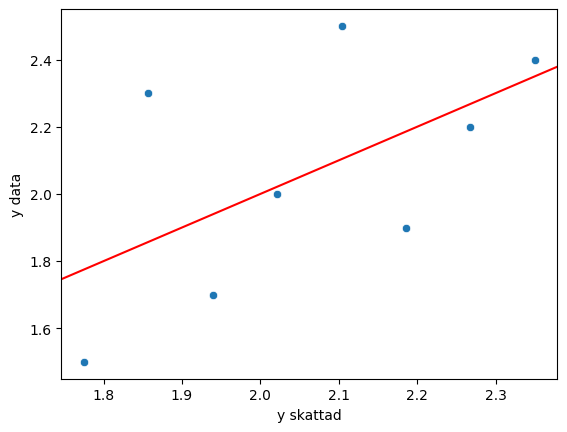

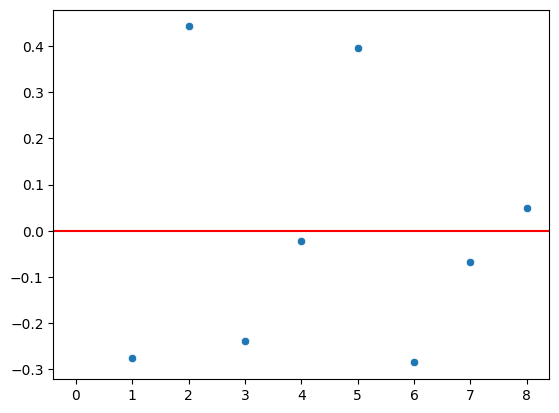

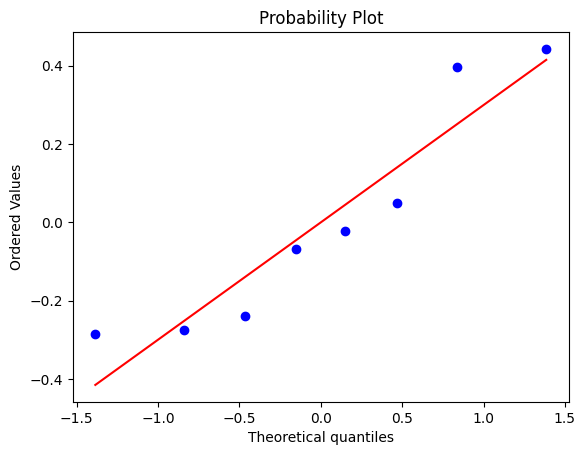

In [24]:
e = model.resid
yhat = model.fittedvalues

sns.scatterplot(x=yhat,y=y)
plt.xlabel("y skattad")
plt.ylabel("y data")
plt.axline((2,2),slope=1,color="red")

plt.figure()
sns.scatterplot(x=x,y=e) # plotta residualer mot x
plt.axline((0,0),slope=0,color="red")
fig,ax = plt.subplots(1,1)
fig = stats.probplot(e,dist="norm",plot=ax) # lämplig fördelningsanpassning

**Uppgift:** Jämför de tre plottarna - vilka verifierar våra modellantaganden?

## Polynomregression

Datamaterialet som du skall arbeta med i detta avsnitt är koldioxidhalter uppmätta vid Mauna Loa (www.co2.earth/monthly~co2) varje månad under 32 år, totalt finns $32 \cdot 12 = 384$ mätvärden. Materialet finns i filen `co2.csv`, och vi börjar med att ladda in den med `pandas`. Därefter medelvärdesbildar vi för varje år för att ta hand om årsvariationen, vilken annars är komplicerad att modellera. Detta görs genom att göra om `co2` till en (32,12) matris och sedan medelvärdesbilda över den andra dimensionen. Vi plottar sedan dessa två dataserier i samma plot.

Text(0.5, 0, 'tid (år)')

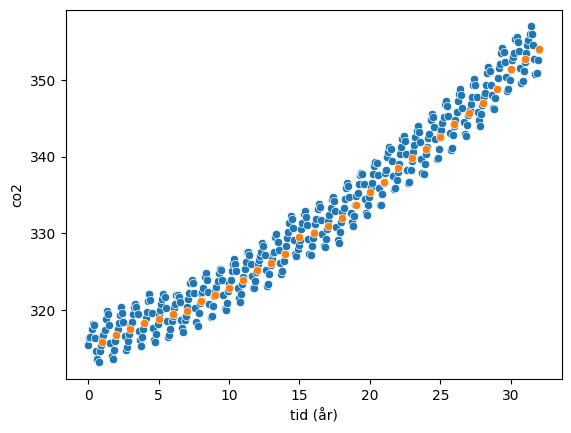

In [25]:
co2 = pd.read_csv("co2.csv") 

y = np.mean(np.reshape(np.array(co2["co2"]),(-1,12)),axis=1)
x = np.arange(np.size(y),dtype=float)+1

sns.scatterplot(x=np.linspace(0,32,np.size(co2["co2"])),y=co2["co2"])
sns.scatterplot(x=x,y=y)
plt.xlabel("tid (år)")

**Uppgift:** Vad kan vi säga om den medelvärdesbildade dataserien? Är periodiciteten kvar?

Vi ska nu göra polynomregression för den medelvärdesbildade datan `y`, dvs använda modellen

\begin{align}
Y_i = \beta_0 + \beta_1 \, x_i + \beta_2 \, x_i^2 + \dots + \beta_k \, x_i^k + \epsilon_i, \ i=1,\dots,n
\nonumber
\end{align}
där $\epsilon_i$ är oberoende och likafördelade avvikelser $N(0,\sigma)$. På matrisform kan vi således använda modellen 

\begin{align}
\mathbf{Y} =  
\mathbf{X} \, \boldsymbol{\beta} + \boldsymbol{\epsilon},
\quad 
\mathbf{X} = 
\begin{bmatrix}
\mathbf{1}_n & \mathbf{x} & \mathbf{x}^2 & \cdots & \mathbf{x}^k
\end{bmatrix}
\nonumber
\end{align}

där $\mathbf{x}^\ell$ anger x-vektorn elementvis upphöjd till $\ell$. Vi börjar med $k=1$ och ökar därefter $k \leftarrow k +1 $. För varje modellordning vill vi avgöra om

1. Verkar modellen passa till datan (plotta $\mathbf{y}$ mot skattningen $\mathbf{X}\, \boldsymbol{\beta}^*_{obs}$)
2. Är residualerna $\mathbf{e} = \mathbf{y} - \mathbf{X}\, \boldsymbol{\beta}^*_{obs}$ oberoende och normalfördelade?
3. Är parametrarna i $\boldsymbol{\beta}$ signifikant skilda från noll? Annars är modellen för stor och en utan den ej signifikanta parametern bör användas.

Testa olika ordningar $k$ och försök avgöra vilken modell som är bäst.

(32, 3)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.921e+04
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           5.31e-46
Time:                        01:46:55   Log-Likelihood:                -8.8199
No. Observations:                  32   AIC:                             23.64
Df Residuals:                      29   BIC:                             28.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        315.1985      0.189   1665.214 

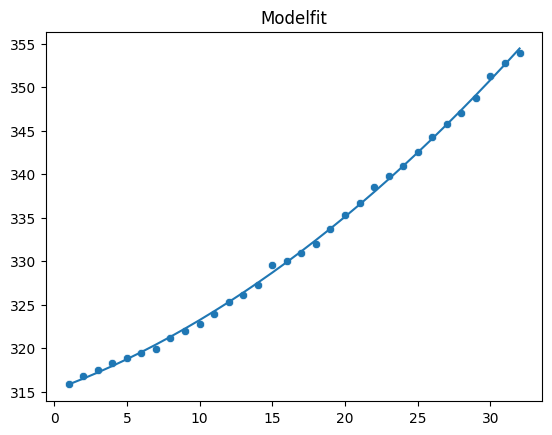

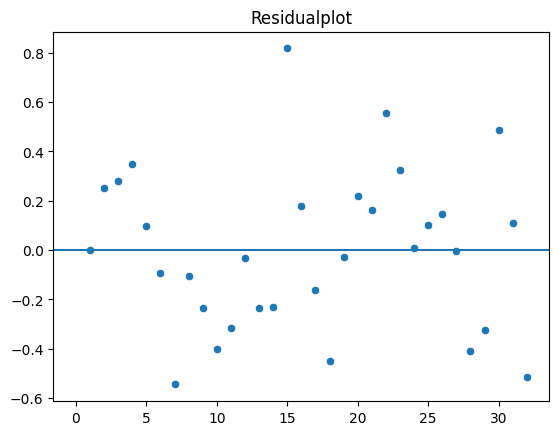

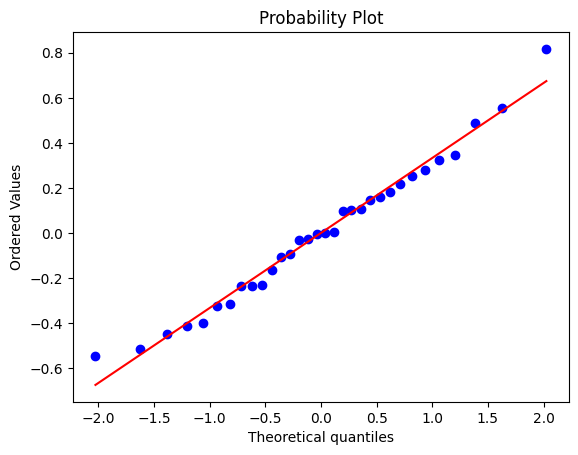

In [26]:
# bygg regressionsmatrisen med k polynomordningar:
X = x # 1:a ordningen 
X = np.column_stack((X,np.power(x,2))) # 2:a ordningen  
#X = np.column_stack((X,?)) # 3:e ordningen
#X = np.column_stack((X,?)) # 4:e ordningen
# ... osv                 
X = sm.add_constant(X) # lägger till en kolumnvektor med ettor först.

print(X.shape)

model = sm.OLS(y,X).fit() # anpassar enkel/multipel linjär regressionsmodell
print(model.summary()) # visar den sammanfattande statistiken

sns.scatterplot(y=y,x=x).set(title="Modelfit")
sns.lineplot(y=model.fittedvalues,x=x)

plt.figure()
sns.scatterplot(x=x,y=model.resid).set(title="Residualplot")
plt.axline((0,0),slope=0)

fig,ax = plt.subplots(1,1)
fig = stats.probplot(model.resid,dist="norm",plot=ax)

**Mozquizto:** Vad verkar vara ett lämpligt gradtal på polynomet för `co2`-datan?

**Mozquizto:** Vad är $\beta$-koefficienterna för detta polynom?

## Multipel regression

Vi ska fortsätta med att skatta regressionsmodeller innehållandes fler än en förklarande variabler. Vi kan välja vilka vi vill inkludera i modellen på olika sätt. Ovan byggde vi regressionmatrisen manuellt, men det finns även inbyggda funktioner för detta.

### Cementdata

I ett klassiskt experiment mättes i $n=13$ försök värmeutvecklingen i stelnande cement som funktion av viktprocenten av några ingående ämnen. I filen `cement.csv` finns följande variabler:

* `cem1`: viktprocent av $3CaO \cdot Al_2 O_3$
* `cem2`: viktprocent av $3CaO \cdot SiO_2$
* `cem3`: viktprocent av $4CaO \cdot Al_2 O_3 \cdot F3_2 O_3$
* `cem4`: viktprocent av $2CaO \cdot SiO_2$
* `varme`: utvecklad värme i kalorier per gram cement

Vissa av de fyra cementvariablerna samvarierar kraftigt med varandra vilket påverkar regressionsanalysen. Plotta responsvariabeln `varme` mot de fyra cementvariablerna samt beräkna korrelationsmatrisen.

           cem1      cem2      cem3      cem4     varme
cem1   1.000000  0.228579 -0.824134 -0.245445  0.730717
cem2   0.228579  1.000000 -0.139242 -0.972955  0.816253
cem3  -0.824134 -0.139242  1.000000  0.029537 -0.534671
cem4  -0.245445 -0.972955  0.029537  1.000000 -0.821305
varme  0.730717  0.816253 -0.534671 -0.821305  1.000000


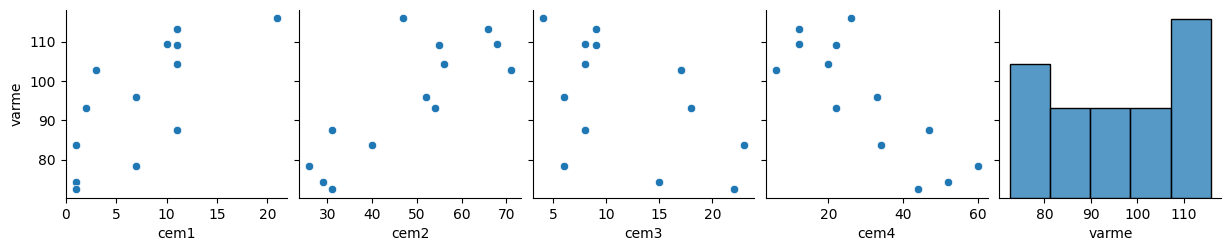

In [27]:
cement = pd.read_csv("cement.csv",names=["cem1","cem2","cem3","cem4","varme"]) 
sns.pairplot(cement,y_vars="varme")
print(cement.corr())

**Mozquizto:** Vilka variabler verkar samvariera?

Vi börjar likväl med att skatta en fullregressionsmodell för samtliga fyra förklarande variabler, samt ett intercept. Genom att använda `statsmodels` kan vi enkelt lägga till och ta bort förklarande variabler. Observera att interceptet alltid inkluderas med denna metodik.

In [28]:
model = smf.ols(formula='varme ~ cem1 + cem2 + cem3 + cem4',data=cement).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  varme   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           4.76e-07
Time:                        01:46:56   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4054     70.071      0.891      0.3

c:\Users\tonny\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


**Mozquizto:** Vilka regressionskoefficienter är signifikant skilda från noll på nivån 0.05?

Förmodligen är du inte alls nöjd med din skattade modell. Ett sätt att hitta den bästa modellen innehållande mellan en och fyra förklarande variabler är att testa samtliga $4!$ kombinationer. Det kan dock vara onödigt arbetsamt - det finns många andra sätt. Ett är att börja med en minimal modell (enkel linjär regression) och sedan lägga till nya förklarande variabler en efter en. Börja t. ex. med den variabel som har högst absolut korrelation med `varme`. Arbeta dig successivt fram till den bästa modellen och glöm inte residualanalysen.

c:\Users\tonny\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:                  varme   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           4.76e-07
Time:                        02:28:48   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4054     70.071      0.891      0.3

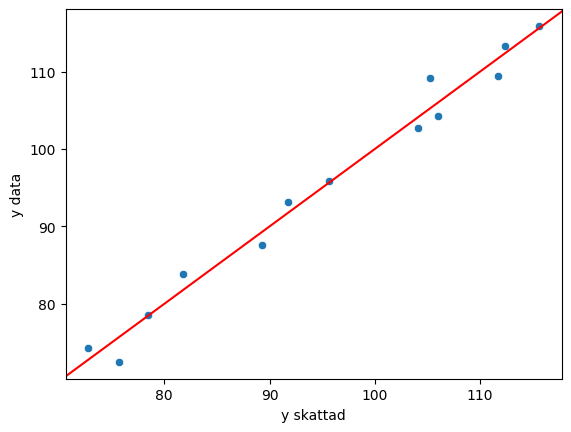

<Figure size 640x480 with 0 Axes>

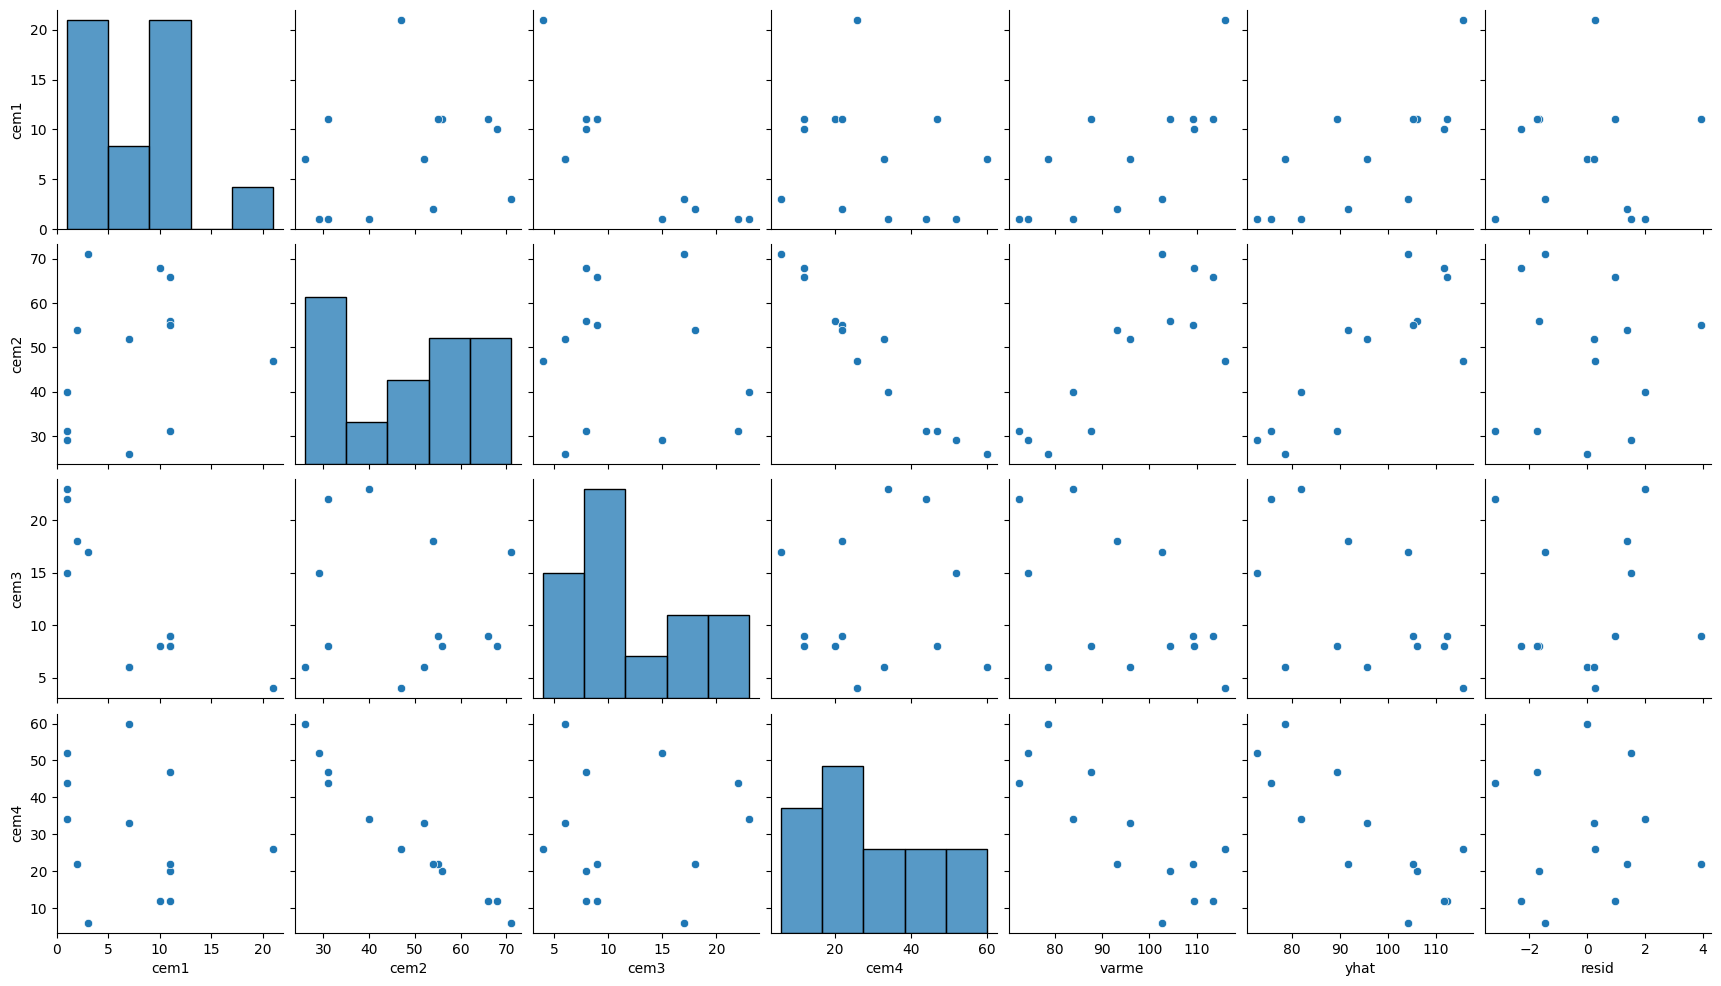

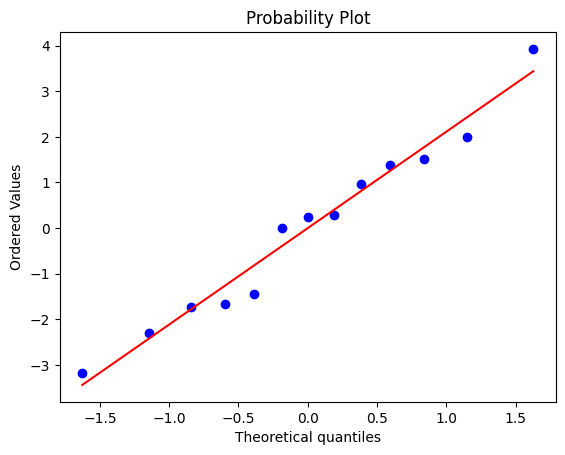

In [38]:
model = smf.ols(formula='varme ~ cem1 + cem2 + cem3 + cem4',data=cement).fit()
cement["yhat"] = model.fittedvalues
cement["resid"] = model.resid

print(model.summary())
print(cement.corr())

sns.scatterplot(cement, x="yhat",y="varme")
plt.xlabel("y skattad")
plt.ylabel("y data")
plt.axline((100,100),slope=1,color="red")


plt.figure()
sns.pairplot(cement,y_vars=["cem1", "cem2", "cem3", "cem4"]) # residualplot


fig,ax = plt.subplots(1,1)
fig = stats.probplot(cement["resid"],dist="norm",plot=ax) # normplot


**Mozquizto:** Vilken modell kom du fram till?

**Mozquizto:** Vad blir skattningarna av $\boldsymbol{\beta}$ för din valda modell?


## Kalibrering av flödesmätare

### Bakgrund

Kalibrering av flödesmätare görs i en speciell kalibreringsrigg där mätningarna från en referensmätare eller referensmetod kan jämföras med mätaren som håller på att kalibreras. Det ger talpar med kalibreringsriggens värden och flödesmätarens värden och dessa används för att ta fram en s.k. kalibreringskurva. Denna kurva avläses  

### Metod

Vi har tillgång till data från en kalibrering av en ultraljudflödesmätare. Datamaterialet kommer från institutionen för värme- och kraftteknik och omfattar $n=71$ mätningar vilka finns i filen `flow2.csv`. Den första kolumnen innehåller flödesmätningen från kalibreringsriggen (förklarande variabeln $\mathbf{x}$) och den andra innehåller flödesmätningen från den testade flödesmätaren (responsvariabeln $\mathbf{y}$), i enheten m/s.

Vi antar att vi kan skatta den testade mätarens flöden som funktion av referensmätningen med en enkel linjär regressionmodell. Det är rimligt att felen i referensmätningarna är försumbara (varför är detta viktigt?) i jämförelse med de uppmätta, vilka antas vara oberoende och normalfördelade med väntevärden 0 och varianser $\sigma^2$.

Vi börjar med att studera en liten delmängd av datamaterialet, $n=10$ mätningar, vilka finns i `flow1.csv`.

Vi vill nu beräkna:

* Den testade flödesmätarens förväntade värde då flödet enligt kalibreringsriggen är $x=0.40$ m/s, samt ett konfidensintervall för detta väntevärde.
* Ett prediktionsintervall för en flödesmätarens faktiska värde då flödet ställts in $x=0.40$ m/s. 
* När flödesmätaren ska användas in situ skall kalibreringskurvan läsas inverterat. Man är alltså intresserad av vad det faktiska flödet är (referensvärdet $x$) då flödesmätaren visar $y=0.48$. Specifikt skall ett 95 % kalibreringsintervall för detta $x(y=0.48)$ beräknas.

Alla dessa kan utläsas ur figuren med linjen, konfidensintervall för linjen, samt prediktionsintervall. Kalibreringsintervallet kan utläsas utifrån prediktionsintervallet för den aktuella $x(y=y_o)$ (se regressionskompendiet). 

Glöm inte att vi också måste validera modellen, dvs bekräfta att regressionsmodellen beskriver sambandet bra och att residualerna följer gjorda antagande.

c:\Users\tonny\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:                    obs   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     425.7
Date:                Tue, 16 Dec 2025   Prob (F-statistic):           3.19e-08
Time:                        02:30:03   Log-Likelihood:                 44.695
No. Observations:                  10   AIC:                            -85.39
Df Residuals:                       8   BIC:                            -84.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0896      0.018      4.878      0.0

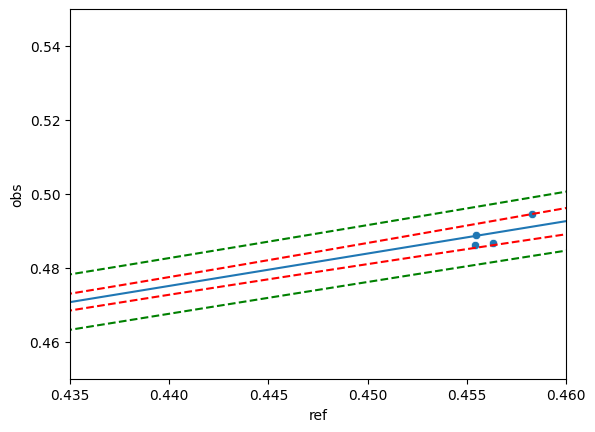

<Figure size 640x480 with 0 Axes>

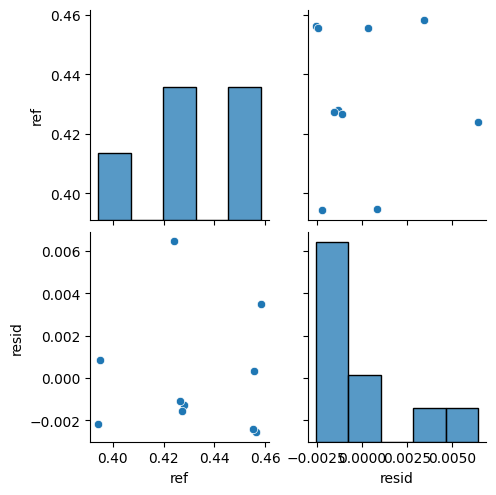

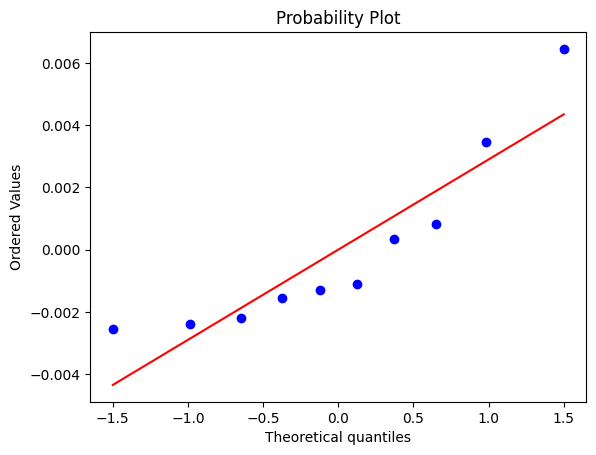

In [41]:
flow = pd.read_csv("flow1.csv",names=["ref","obs"])

model = smf.ols(data=flow,formula="obs ~ ref").fit()
flow["yhat"] = model.fittedvalues
flow["resid"] = model.resid
print(model.summary())

flow_interp = pd.DataFrame({'ref':  np.linspace(0.38,0.48,100)}) # ange område att titta kring

pred = model.get_prediction(flow_interp).summary_frame(alpha=0.05)
flow_interp["mean"] = pred["mean"]
flow_interp["ci_lower"] = pred["mean_ci_lower"]
flow_interp["ci_upper"] = pred["mean_ci_upper"]
flow_interp["pi_lower"] = pred["obs_ci_lower"]
flow_interp["pi_upper"] = pred["obs_ci_upper"]

sns.scatterplot(flow,x="ref",y="obs")
sns.lineplot(flow_interp,x="ref",y="mean")
sns.lineplot(flow_interp,x="ref",y="ci_lower",color="red",linestyle="--")
sns.lineplot(flow_interp,x="ref",y="ci_upper",color="red",linestyle="--")
sns.lineplot(flow_interp,x="ref",y="pi_lower",color="green",linestyle="--")
sns.lineplot(flow_interp,x="ref",y="pi_upper",color="green",linestyle="--")
plt.xlim([0.435,0.46])
plt.ylim([0.45,.55])

plt.figure()
sns.pairplot(flow,y_vars=["ref","resid"],x_vars={"ref","resid"})

fig,ax = plt.subplots(1,1)
fig = stats.probplot(flow["resid"],dist="norm",plot=ax)


**Mozquizto:** Vad blev konfidensintervallet, prediktionsintervallet och kalibreringsintervallet beräknat ovan?

Gör nu om beräkningarna för det större datamaterialet `flow2.csv`

                            OLS Regression Results                            
Dep. Variable:                    obs   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.377e+04
Date:                Tue, 16 Dec 2025   Prob (F-statistic):          2.93e-106
Time:                        02:32:00   Log-Likelihood:                 289.04
No. Observations:                  71   AIC:                            -574.1
Df Residuals:                      69   BIC:                            -569.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0296      0.002     18.176      0.0

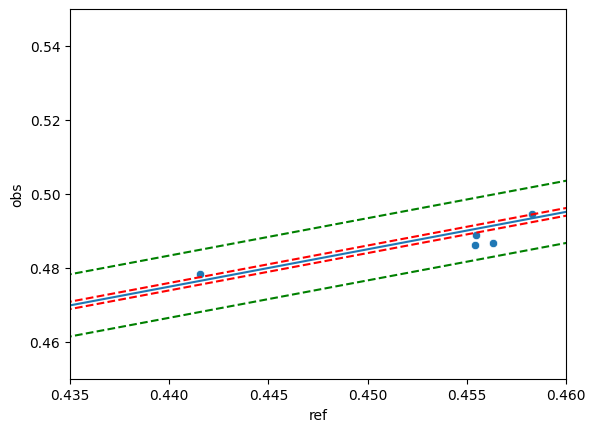

<Figure size 640x480 with 0 Axes>

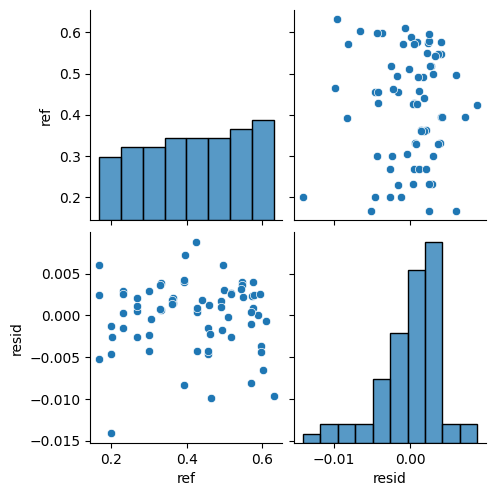

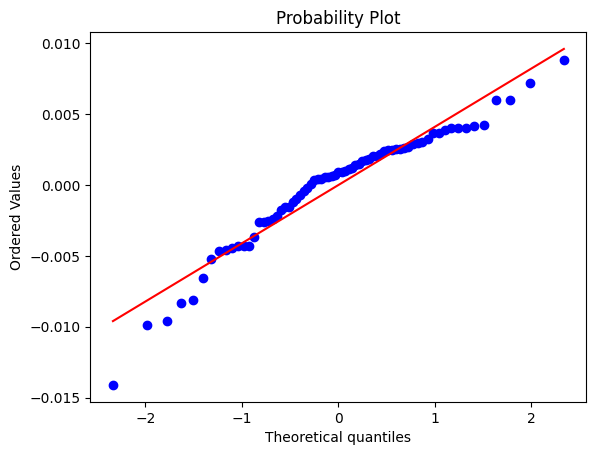

In [43]:
#flow = pd.read_csv("flow1.csv",names=["ref","obs"])

# ... Fyll i lämplig kod här.

flow = pd.read_csv("flow2.csv",names=["ref","obs"])

model = smf.ols(data=flow,formula="obs ~ ref").fit()
flow["yhat"] = model.fittedvalues
flow["resid"] = model.resid
print(model.summary())

flow_interp = pd.DataFrame({'ref':  np.linspace(0.38,0.48,100)}) # ange område att titta kring

pred = model.get_prediction(flow_interp).summary_frame(alpha=0.05)
flow_interp["mean"] = pred["mean"]
flow_interp["ci_lower"] = pred["mean_ci_lower"]
flow_interp["ci_upper"] = pred["mean_ci_upper"]
flow_interp["pi_lower"] = pred["obs_ci_lower"]
flow_interp["pi_upper"] = pred["obs_ci_upper"]

sns.scatterplot(flow,x="ref",y="obs")
sns.lineplot(flow_interp,x="ref",y="mean")
sns.lineplot(flow_interp,x="ref",y="ci_lower",color="red",linestyle="--")
sns.lineplot(flow_interp,x="ref",y="ci_upper",color="red",linestyle="--")
sns.lineplot(flow_interp,x="ref",y="pi_lower",color="green",linestyle="--")
sns.lineplot(flow_interp,x="ref",y="pi_upper",color="green",linestyle="--")
plt.xlim([0.435,0.46])
plt.ylim([0.45,.55])

plt.figure()
sns.pairplot(flow,y_vars=["ref","resid"],x_vars={"ref","resid"})

fig,ax = plt.subplots(1,1)
fig = stats.probplot(flow["resid"],dist="norm",plot=ax)


**Mozquizto:** Vad blev konfidensintervallet, prediktionsintervallet och kalibreringsintervallet beräknat på det större datamaterialet?

Jämför bredden på intervallen för det mindre och det större datamaterialet. Skiljer de sig åt väsentligt eller inte och varför?

Vi kan också beräkna intervallen exakt, istället för att utläsa ur figuren. För linjens värde $\mu(x_0)$, dess konfidensintervall $I_{\mu(x_0)}$ och prediktionsintervallet $I_{y(x_0)}$ beräknas detta med `.get_prediction(flow0).summary_frame(alpha=0.05)`, där `flow0` är en ny dataframe innehållandes värdet $x_0$. För kalibreringsintervallet räknar vi efter formeln i regressionskompendiet.

In [44]:

# linjen=förväntat värde, konfidensintervall, prediktionsintervall:
x0 = flow["ref"].mean()
flow0 = pd.DataFrame({'ref': [x0]})
pred0 = model.get_prediction(flow0).summary_frame(alpha=0.05)
print(pred0)

# kalibreringsintervall:
y0 = flow["obs"].mean()
Sxx = np.sum( np.power(flow["ref"] - np.mean(flow["ref"]),2))
xcal0 = (y0 - model.params[0])/model.params[1]
dxcal0 = model.scale**0.5 / np.abs(model.params[1])*np.sqrt(1 + 1/flow.shape[0] + (y0-np.mean(flow["obs"]))**2 / model.params[1]**2 / Sxx)
tinv = stats.t.ppf(1-0.05/2,model.df_resid) #t-kvantil
Ixcal0 = xcal0 + np.array([-1,1])*tinv*dxcal0

print(Ixcal0)

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  0.450758  0.000497       0.449767        0.45175      0.442346   

   obs_ci_upper  
0      0.459171  
[0.40783245 0.42445789]


C:\Users\tonny\AppData\Local\Temp\ipykernel_34576\2908068377.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xcal0 = (y0 - model.params[0])/model.params[1]
C:\Users\tonny\AppData\Local\Temp\ipykernel_34576\2908068377.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dxcal0 = model.scale**0.5 / np.abs(model.params[1])*np.sqrt(1 + 1/flow.shape[0] + (y0-np.mean(flow["obs"]))**2 / model.params[1]**2 / Sxx)


**Mozquizto:** Vad blir de exakta beräkningarna av förväntat värde, konfidensintervall för detta, prediktionsintervall samt kalibreringsintervall?